In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve,plot_precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
import gc
gc.enable()

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import xgboost as xgb
import lightgbm as lgb
import catboost
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score
import matplotlib.gridspec as gridspec
%matplotlib inline

# Standard plotly imports
# import plotly.plotly as py
# import plotly.graph_objs as go
# import plotly.tools as tls
# from plotly.offline import iplot, init_notebook_mode
import cufflinks
import cufflinks as cf
import plotly.figure_factory as ff

# Using plotly + cufflinks in offline mode
# init_notebook_mode(connected=True)
cufflinks.go_offline(connected=True)


import warnings
warnings.filterwarnings("ignore")

import gc
gc.enable()

import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

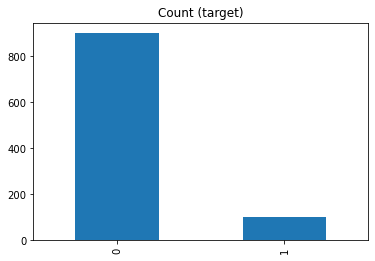

In [91]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=1000, random_state=10
)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)')

In [92]:
def logistic(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    prob=lr.predict_proba(X_test)
    return (prob[:,1],y_test)

In [93]:
probs,y_test=logistic(X,y)

In [94]:
def plot_pre_curve(y_test,probs):
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    plt.title("precision recall curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the plot
    plt.show()
    
def plot_roc(y_test,prob):
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    # show the plot
    plt.show()

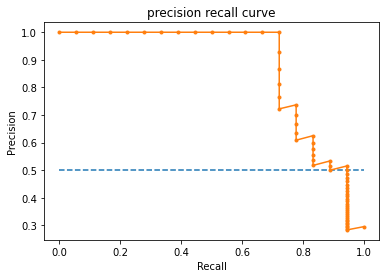

In [95]:
plot_pre_curve(y_test,probs)

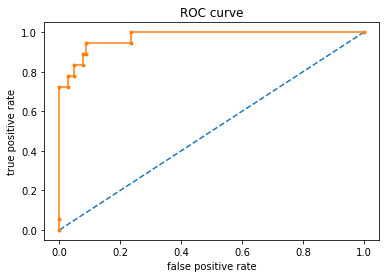

In [96]:
plot_roc(y_test,probs)

In [97]:
def plot_2d_space(X_train, y_train,X=X,y=y ,label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    
    fig,(ax1,ax2)=plt.subplots(1,2, figsize=(8,4))
   
    for l, c, m in zip(np.unique(y), colors, markers):
        ax1.scatter(
            X_train[y_train==l, 0],
            X_train[y_train==l, 1],
            c=c, label=l, marker=m
        )
    for l, c, m in zip(np.unique(y), colors, markers):
        ax2.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
   
    ax1.set_title(label)
    ax2.set_title('original data')
    plt.legend(loc='upper right')
    plt.show()

In [98]:
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 6.8 s
PCA took 0.007 s
Truncated SVD took 0.006 s


In [99]:
df.head()


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.600131,-1.427664,-0.812843,0.186196,-0.446072,0.961538,-0.108172,-0.121374,-0.064468,-1.331016,...,-0.139450,0.030954,-0.517951,-0.429622,-0.450095,2.303853,-0.553024,0.148770,-1.247959,0
1,0.253641,-1.456387,-0.522598,-1.200570,-0.595553,-1.588192,-0.489398,0.752679,-0.433422,1.552543,...,-0.753243,0.655625,0.612429,-1.190286,0.197738,1.001912,1.694093,-0.249699,0.270857,0
2,0.182256,-1.279602,0.678077,-0.107072,-1.891533,1.219016,0.131442,0.766967,-1.461127,-0.505163,...,0.361457,0.535316,-1.117117,0.500309,-0.062337,-1.664217,-0.811151,-0.287336,-1.234176,0
3,-0.313907,-2.714269,-0.461789,0.451429,0.299209,1.311730,0.320658,-1.460665,-1.075703,0.303755,...,-0.850576,-2.456657,-0.533510,-1.476944,0.430563,-1.735455,-2.002849,1.215284,-0.500204,0
4,-1.262870,0.119181,-1.234628,0.253147,1.551433,1.651135,-0.034720,-0.633148,-1.769543,-0.164800,...,1.080204,-0.765970,-0.633663,-2.961579,1.494173,-2.712421,-0.617613,-1.445949,-1.485457,0


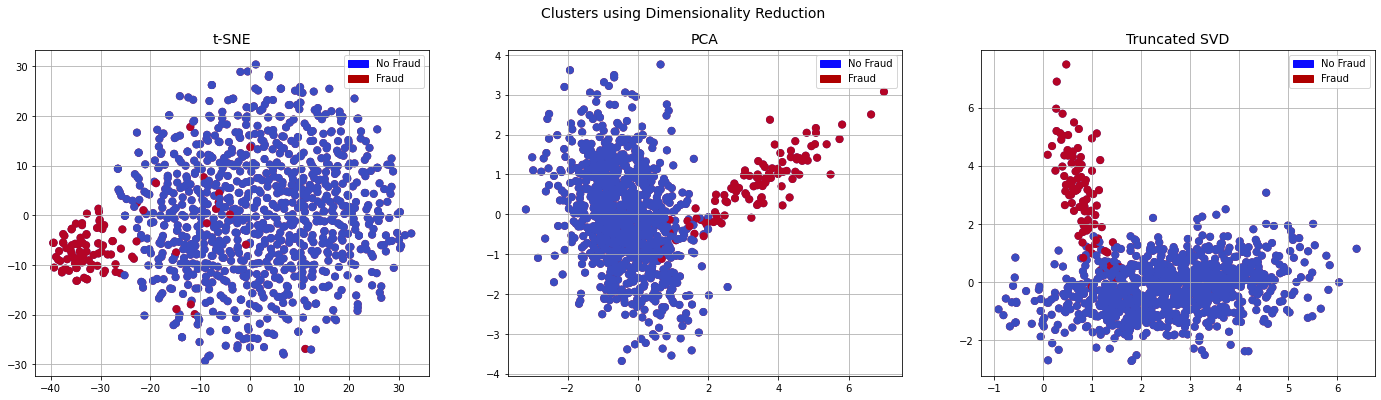

In [100]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [101]:
X

array([[ 0.60013068, -1.42766402, -0.8128431 , ..., -0.55302378,
         0.14876985, -1.24795877],
       [ 0.25364115, -1.45638734, -0.52259796, ...,  1.69409346,
        -0.24969905,  0.27085707],
       [ 0.18225579, -1.27960188,  0.6780773 , ..., -0.81115113,
        -0.28733609, -1.23417595],
       ...,
       [-1.47024551,  1.44291998, -0.61025173, ..., -0.80856535,
         0.92899574, -0.98753905],
       [ 1.16080297,  1.07930132, -0.10917057, ..., -2.58494382,
        -1.74326156, -0.54876536],
       [-0.29874435, -1.48144343, -0.34051766, ..., -0.17772046,
        -0.13834763, -1.10924765]])

In [102]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.600131,-1.427664,-0.812843,0.186196,-0.446072,0.961538,-0.108172,-0.121374,-0.064468,-1.331016,...,-0.139450,0.030954,-0.517951,-0.429622,-0.450095,2.303853,-0.553024,0.148770,-1.247959,0
1,0.253641,-1.456387,-0.522598,-1.200570,-0.595553,-1.588192,-0.489398,0.752679,-0.433422,1.552543,...,-0.753243,0.655625,0.612429,-1.190286,0.197738,1.001912,1.694093,-0.249699,0.270857,0
2,0.182256,-1.279602,0.678077,-0.107072,-1.891533,1.219016,0.131442,0.766967,-1.461127,-0.505163,...,0.361457,0.535316,-1.117117,0.500309,-0.062337,-1.664217,-0.811151,-0.287336,-1.234176,0
3,-0.313907,-2.714269,-0.461789,0.451429,0.299209,1.311730,0.320658,-1.460665,-1.075703,0.303755,...,-0.850576,-2.456657,-0.533510,-1.476944,0.430563,-1.735455,-2.002849,1.215284,-0.500204,0
4,-1.262870,0.119181,-1.234628,0.253147,1.551433,1.651135,-0.034720,-0.633148,-1.769543,-0.164800,...,1.080204,-0.765970,-0.633663,-2.961579,1.494173,-2.712421,-0.617613,-1.445949,-1.485457,0


In [103]:
not_fraud = df[df.target==0]

In [104]:
not_fraud.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.600131,-1.427664,-0.812843,0.186196,-0.446072,0.961538,-0.108172,-0.121374,-0.064468,-1.331016,...,-0.139450,0.030954,-0.517951,-0.429622,-0.450095,2.303853,-0.553024,0.148770,-1.247959,0
1,0.253641,-1.456387,-0.522598,-1.200570,-0.595553,-1.588192,-0.489398,0.752679,-0.433422,1.552543,...,-0.753243,0.655625,0.612429,-1.190286,0.197738,1.001912,1.694093,-0.249699,0.270857,0
2,0.182256,-1.279602,0.678077,-0.107072,-1.891533,1.219016,0.131442,0.766967,-1.461127,-0.505163,...,0.361457,0.535316,-1.117117,0.500309,-0.062337,-1.664217,-0.811151,-0.287336,-1.234176,0
3,-0.313907,-2.714269,-0.461789,0.451429,0.299209,1.311730,0.320658,-1.460665,-1.075703,0.303755,...,-0.850576,-2.456657,-0.533510,-1.476944,0.430563,-1.735455,-2.002849,1.215284,-0.500204,0
4,-1.262870,0.119181,-1.234628,0.253147,1.551433,1.651135,-0.034720,-0.633148,-1.769543,-0.164800,...,1.080204,-0.765970,-0.633663,-2.961579,1.494173,-2.712421,-0.617613,-1.445949,-1.485457,0


In [105]:
fraud = df[df.target==1]

In [106]:
fraud.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
6,-1.315254,0.047394,0.566718,0.167236,-1.323716,2.057687,2.248355,0.368006,1.675341,-2.235193,...,1.635307,0.074537,-0.331682,0.121484,0.012671,-0.579211,0.615647,0.601194,-0.813895,1
20,0.664333,-0.148993,0.303194,0.477864,-0.863419,2.658828,3.812249,-0.508744,0.855335,0.049165,...,-0.664048,0.044522,0.152846,-2.100380,1.542913,-1.287911,0.856575,-1.253047,-1.556246,1
30,0.665321,1.083949,1.030695,-1.168108,0.236559,1.687996,3.806345,1.649788,1.001319,-0.790256,...,0.473536,2.336529,0.439184,0.691215,0.094069,-0.097049,-0.687583,1.214918,-2.180434,1
33,-0.701255,0.532170,-0.329650,0.067755,-1.463004,1.053836,2.998510,-2.502390,0.112050,-0.729161,...,0.071949,-2.505341,-0.030826,-0.338067,-0.619409,1.579996,-0.670324,-0.805867,-2.083634,1
35,0.327691,0.077251,0.941155,-0.704606,0.157105,1.093172,2.379943,-0.700661,-1.824166,-0.136194,...,-0.572303,-0.918003,1.178462,0.213814,1.812191,-2.537033,-0.300304,0.861638,-1.813624,1


In [108]:
y_fraud = fraud['target']

In [86]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.ga import genetic_algorithm
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample

# drop target column
#not_fraud = not_fraud.drop('target', axis=1)
km = KMeans(n_clusters=10).fit(not_fraud)
ga = genetic_algorithm(data=not_fraud,
                                count_clusters=4,
                                chromosome_count=100,
                                population_count=200,
                                count_mutation_gens=1)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = not_fraud.index.values
cluster_map['cluster'] = km.labels_



In [109]:
for i in range(10):
    print(cluster_map[cluster_map.cluster==i].size)

140
210
204
136
194
198
192
188
152
186


0


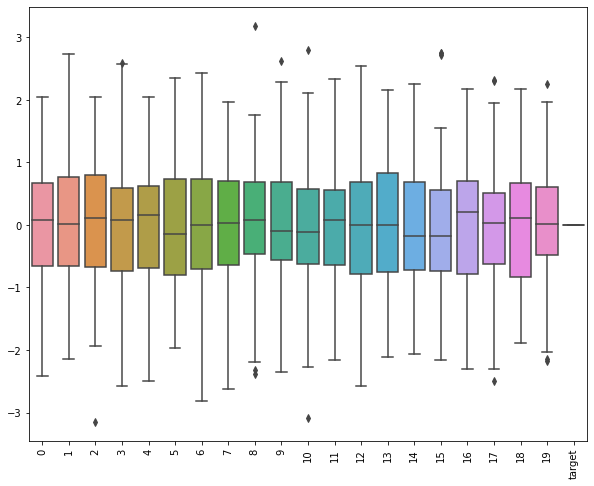

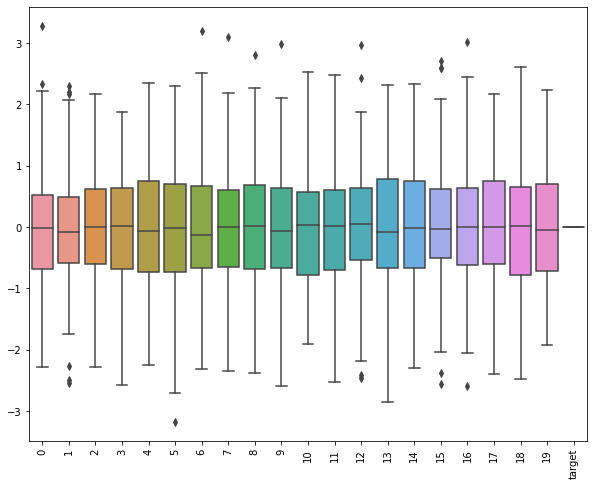

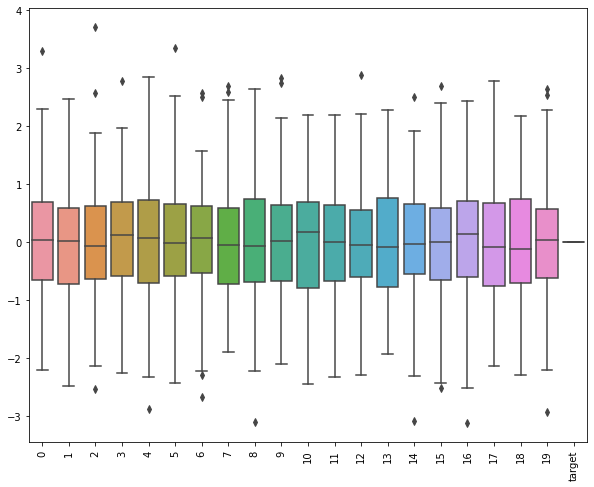

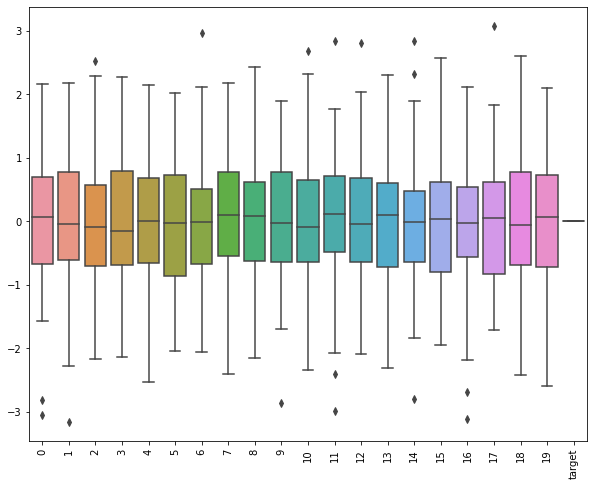

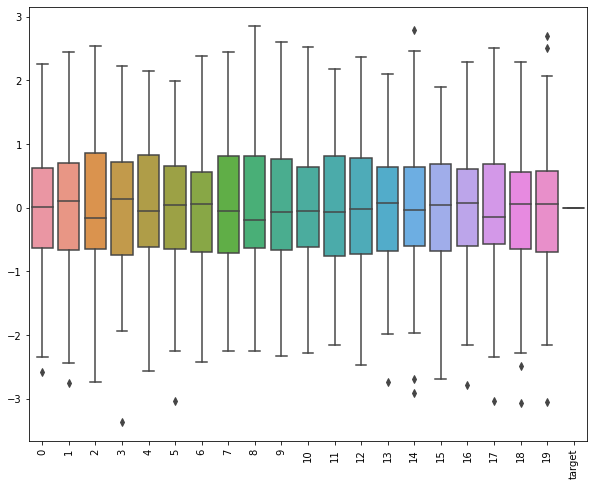

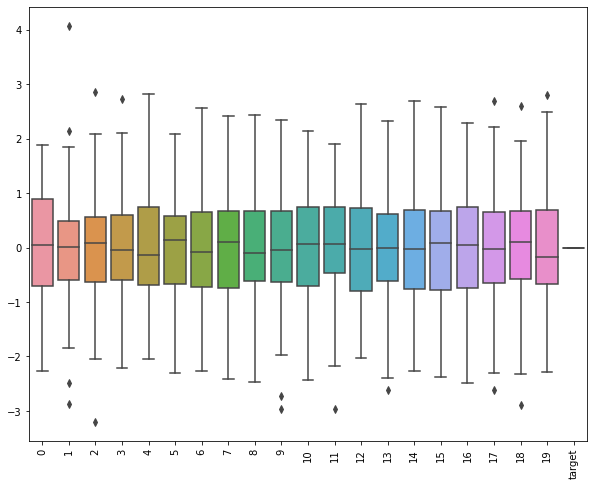

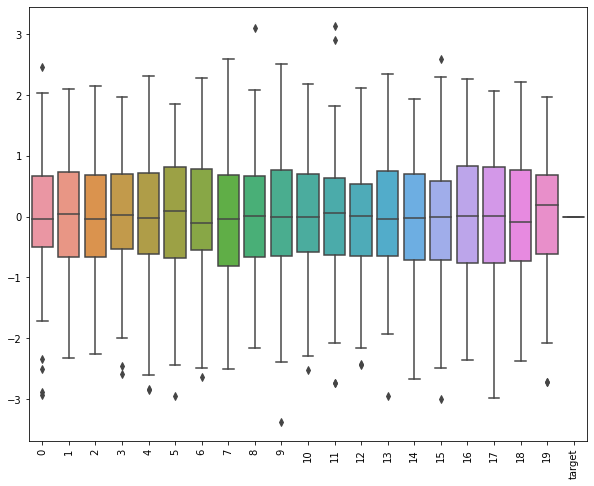

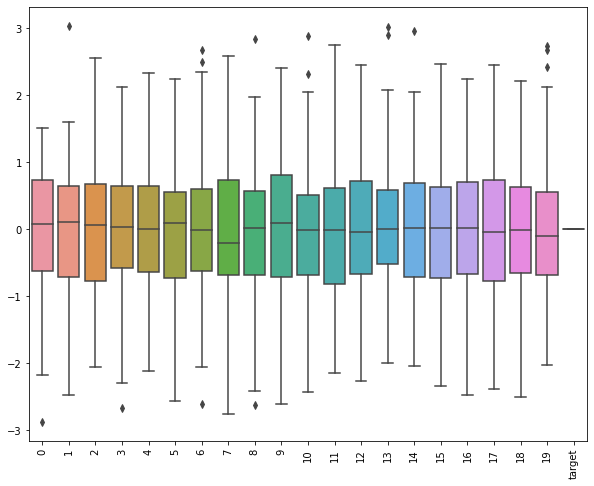

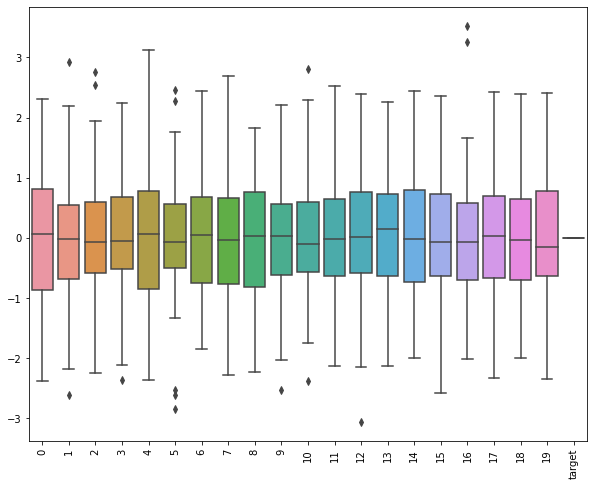

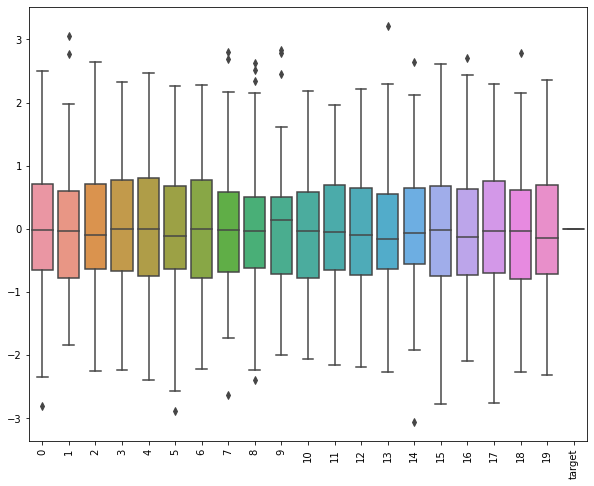

In [110]:
from sklearn.preprocessing import StandardScaler

not_fraud_filtered_data = not_fraud.iloc[0:0,:].copy()
print(not_fraud_filtered_data.size)

for i in range(10):
    filter_df = not_fraud[not_fraud.index.isin(cluster_map[cluster_map.cluster==i].data_index)]
#     print(filter_df.head())
    fig, ax = plt.subplots(figsize=(10,8))
#     bp = sns.boxplot(data = filter_df)
#     bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
    
    scaler = StandardScaler()
    scaled_array = scaler.fit_transform(filter_df)
    
    scaled_data = pd.DataFrame(scaled_array, columns = filter_df.columns)
    

    
    bp = sns.boxplot(data = scaled_data)
    bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
    
    
    Q1 = filter_df.quantile(0.25)
    Q3 = filter_df.quantile(0.75)
    

    IQR = Q3 - Q1

    
    outliers_removed_data = filter_df[~((filter_df < (Q1 - 1.5 * IQR)) |(filter_df > (Q3 + 1.5 * IQR))).any(axis=1)]
    not_fraud_filtered_data.append(outliers_removed_data, ignore_index=True,sort=False)
    not_fraud_filtered_data = pd.concat([not_fraud_filtered_data, outliers_removed_data])
    

In [111]:
print(not_fraud.size)
print(not_fraud_filtered_data.size)

18900
15393


In [112]:
not_fraud

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.600131,-1.427664,-0.812843,0.186196,-0.446072,0.961538,-0.108172,-0.121374,-0.064468,-1.331016,...,-0.139450,0.030954,-0.517951,-0.429622,-0.450095,2.303853,-0.553024,0.148770,-1.247959,0
1,0.253641,-1.456387,-0.522598,-1.200570,-0.595553,-1.588192,-0.489398,0.752679,-0.433422,1.552543,...,-0.753243,0.655625,0.612429,-1.190286,0.197738,1.001912,1.694093,-0.249699,0.270857,0
2,0.182256,-1.279602,0.678077,-0.107072,-1.891533,1.219016,0.131442,0.766967,-1.461127,-0.505163,...,0.361457,0.535316,-1.117117,0.500309,-0.062337,-1.664217,-0.811151,-0.287336,-1.234176,0
3,-0.313907,-2.714269,-0.461789,0.451429,0.299209,1.311730,0.320658,-1.460665,-1.075703,0.303755,...,-0.850576,-2.456657,-0.533510,-1.476944,0.430563,-1.735455,-2.002849,1.215284,-0.500204,0
4,-1.262870,0.119181,-1.234628,0.253147,1.551433,1.651135,-0.034720,-0.633148,-1.769543,-0.164800,...,1.080204,-0.765970,-0.633663,-2.961579,1.494173,-2.712421,-0.617613,-1.445949,-1.485457,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.465980,-0.116475,-1.367398,0.257924,2.022202,-0.443443,-0.760212,0.203001,-0.250930,0.248399,...,-1.204348,-0.179539,1.718929,2.785293,0.008400,-0.635932,0.235752,1.236801,-0.914625,0
996,-0.016326,-0.618306,-1.159263,-1.430355,-0.280692,0.410943,-0.521141,-0.871617,-0.332513,-0.273864,...,-0.201208,2.311548,1.101763,1.419457,0.512700,-1.867728,-0.031862,-0.343076,-0.823421,0
997,-1.470246,1.442920,-0.610252,2.232025,0.420092,1.313031,0.375612,-2.402991,2.227258,1.552156,...,0.494304,0.706400,2.081467,-0.293248,-0.659518,-0.739311,-0.808565,0.928996,-0.987539,0
998,1.160803,1.079301,-0.109171,-0.277715,-0.553123,0.019908,-0.374333,-1.071314,0.445164,1.101574,...,0.629303,0.324765,0.120767,-0.390811,1.075743,-0.391347,-2.584944,-1.743262,-0.548765,0


In [113]:
not_fraud_filtered_data['target'] = not_fraud_filtered_data['target'].fillna(0)

In [114]:
filterd_fraud_not_fraud = pd.concat([not_fraud_filtered_data, fraud])

In [115]:
filterd_fraud_not_fraud.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
8,0.815495,-1.394260,1.391815,0.302027,0.653445,3.188080,-0.287228,-1.127735,-0.224251,2.209049,...,0.557009,-0.540166,1.311945,1.722492,-1.552141,0.865992,0.444884,0.269631,-2.831604,0
41,0.913506,0.825598,0.633212,-1.937243,1.063265,2.280779,-0.268439,-0.441668,-0.115330,-1.103065,...,-2.000570,0.588133,-0.758331,0.379126,-1.251909,1.118369,0.756833,0.079964,-2.403605,0
61,0.124421,0.271933,0.299389,0.058946,0.668147,4.354953,0.338370,-2.664024,0.168257,-0.844670,...,-2.395456,0.105781,0.079378,-0.351872,-0.957602,-1.606855,0.263062,0.141050,-2.908364,0
80,1.163619,-0.259885,-0.696317,-1.259079,-0.314264,2.103160,0.174900,0.590850,-1.173294,-0.309877,...,0.398531,-0.630632,0.005661,0.181764,-1.478236,-0.619556,1.078539,-1.002233,-1.474492,0
101,-0.273092,0.588261,-1.605779,1.020785,0.919908,4.053269,0.110600,1.338089,0.675364,-0.338962,...,-1.802394,1.697712,-0.212744,-1.236868,0.206701,0.731366,0.154807,0.128808,-2.618113,0


In [116]:
filterd_fraud_not_fraud['target'] = filterd_fraud_not_fraud['target'].fillna(0)

In [34]:
#fraud = df[df.target==1]
not_fraud_filtered_ff = filterd_fraud_not_fraud[filterd_fraud_not_fraud.target==0.0]
y_not_fraud = not_fraud_filtered_ff['target']

not_fraud_filtered_fr = filterd_fraud_not_fraud[filterd_fraud_not_fraud.target==1.0]
y_fraud = not_fraud_filtered_fr['target']


In [35]:
y_not_fraud

2      0
39     0
54     0
73     0
79     0
      ..
906    0
953    0
958    0
967    0
985    0
Name: target, Length: 739, dtype: int32

In [36]:
y_fraud

6      1
20     1
30     1
33     1
35     1
      ..
968    1
971    1
974    1
977    1
994    1
Name: target, Length: 100, dtype: int32

In [37]:
# filterd_fraud_not_fraud.head()
filterd_fraud_not_fraud.size

17619

In [38]:
filterd_fraud_not_fraud['target'] = filterd_fraud_not_fraud['target'].fillna(0)

In [39]:
y_not_fraud = filterd_fraud_not_fraud['target']

In [40]:
y_not_fraud

2      0
39     0
54     0
73     0
79     0
      ..
968    1
971    1
974    1
977    1
994    1
Name: target, Length: 839, dtype: int32

In [41]:
filterd_fraud_not_fraud.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
2,0.182256,-1.279602,0.678077,-0.107072,-1.891533,1.219016,0.131442,0.766967,-1.461127,-0.505163,...,0.361457,0.535316,-1.117117,0.500309,-0.062337,-1.664217,-0.811151,-0.287336,-1.234176,0
39,-0.563606,1.283227,0.422174,-0.226670,-0.163169,1.601684,0.301402,-0.634312,-0.321405,1.018441,...,-0.701983,1.718059,-0.491063,-1.146031,0.057364,1.038139,-0.720156,1.084384,-0.619830,0
54,-0.911833,0.300914,-0.509908,-0.557023,0.050069,1.413854,-0.189123,0.116185,-2.556273,0.814016,...,1.329034,-0.694069,-1.280114,-0.028684,-0.054184,0.604208,1.426328,0.142266,-1.205494,0
73,-0.202578,0.579860,-0.095521,-0.721504,1.149883,1.625660,-0.599086,-0.021696,0.397096,-0.330337,...,1.347767,-0.818556,-1.863777,1.080323,-2.045863,0.110189,-0.515181,0.861654,-1.921313,0
79,-1.098244,-0.925142,0.220981,-0.474532,0.572135,-0.938470,-0.326338,-0.552594,0.894073,1.084795,...,0.536113,3.019295,-0.537557,1.125290,-1.450758,-1.229368,-1.451197,1.378419,-0.352403,0


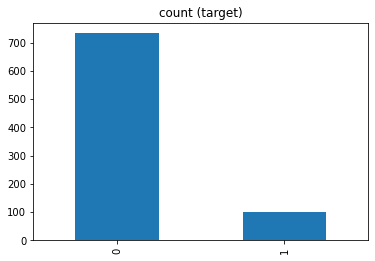

In [117]:
filterd_fraud_not_fraud.target.value_counts().plot(kind='bar', title='count (target)')

In [43]:
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [118]:
from imblearn.under_sampling import RandomUnderSampler # doctest: +NORMALIZE_WHITESPACE

ran=RandomUnderSampler() ##intialize to return indices of dropped rows
X_rs,y_rs = ran.fit_resample(X,y)

# print("The number of removed indices are ",len(dropped))
# plot_2d_space(X_rs,y_rs,X,y,'Random under sampling')

In [119]:
xx = filterd_fraud_not_fraud.to_numpy

In [120]:
filterd_fraud_not_fraud = filterd_fraud_not_fraud.drop('target', axis=1)

In [121]:
yy = pd.concat([y_not_fraud, y_fraud])

The new data contains 1800 rows 


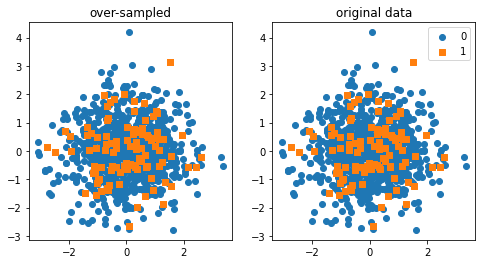

In [122]:
from imblearn.over_sampling import RandomOverSampler

ran=RandomOverSampler()
X_ran,y_ran= ran.fit_resample(X,y)

print('The new data contains {} rows '.format(X_ran.shape[0]))

plot_2d_space(X_ran,y_ran,X,y,'over-sampled')

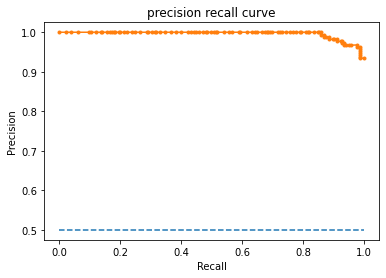

In [123]:
probs,y_test=logistic(X_ran,y_ran)
plot_pre_curve(y_test,probs)

In [124]:
from imblearn.over_sampling import RandomOverSampler

ran=RandomOverSampler()
X_ran,y_ran= ran.fit_resample(X_train,y_train)


NameError: name 'X_train' is not defined

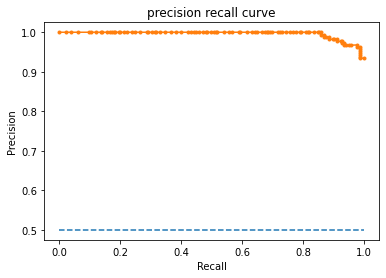

In [125]:
probs,y_test=logistic(X_ran,y_ran)
plot_pre_curve(y_test,probs)

In [126]:
y_train=filterd_fraud_not_fraud['target'].astype('uint8')

KeyError: 'target'

In [127]:
X_train,X_test,y_train,y_test=train_test_split(filterd_fraud_not_fraud.drop('target',axis=1),y_train,test_size=.2,random_state=1)

KeyError: "['target'] not found in axis"

In [386]:
from imblearn.under_sampling import RandomUnderSampler

ran=RandomUnderSampler() ##intialize to return indices of dropped rows
X_rs,y_rs = ran.fit_sample(X,y)


#plot_2d_space(X_rs,y_rs,X_train,y_train,'Random under sampling')

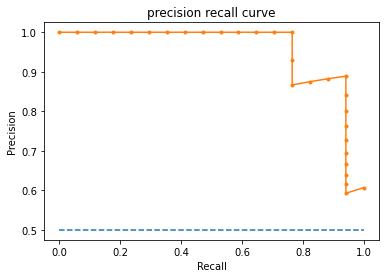

In [387]:
probs,y_test=logistic(X_rs,y_rs)
plot_pre_curve(y_test,probs)

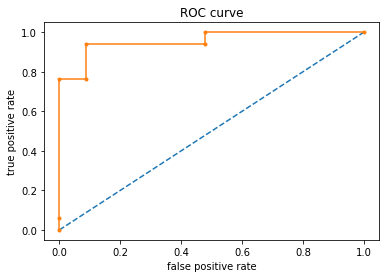

In [388]:
plot_roc(y_test,probs)

In [389]:
from imblearn.under_sampling import RandomUnderSampler

ran=RandomUnderSampler() ##intialize to return indices of dropped rows
X_rs,y_rs = ran.fit_sample(X_train,y_train)


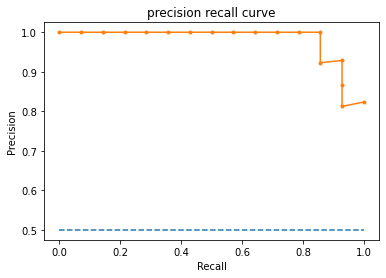

In [390]:
probs,y_test=logistic(X_rs,y_rs)
plot_pre_curve(y_test,probs)

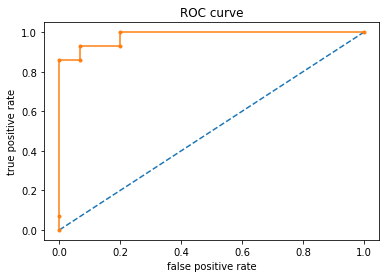

In [391]:
plot_roc(y_test,probs)


In [312]:
X=pd.concat([X_train,y_train],axis=1)


not_fraud=X[X.target==0]
fraud=X[X.target==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.target.value_counts()

1    597
0    597
Name: target, dtype: int64

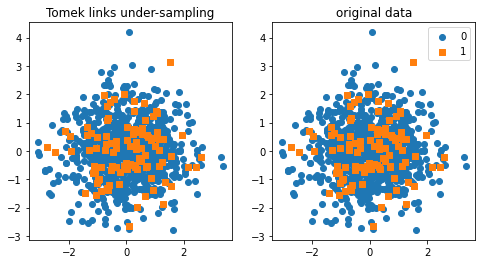

In [435]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks( )
X_tl, y_tl = tl.fit_sample(X, y)

#print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl,X,y, 'Tomek links under-sampling')

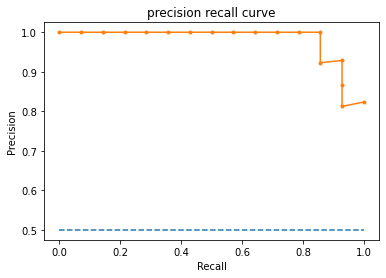

In [437]:
probs,y_test=logistic(X_rs,y_rs)
plot_pre_curve(y_test,probs)

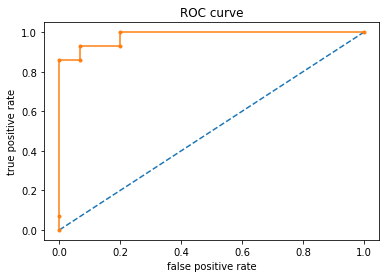

In [438]:
plot_roc(y_test,probs)


In [440]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks( )
X_tl, y_tl = tl.fit_sample(X_train, y_train)


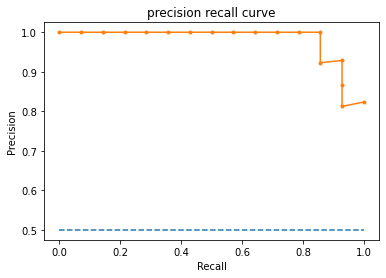

In [441]:
probs,y_test=logistic(X_rs,y_rs)
plot_pre_curve(y_test,probs)

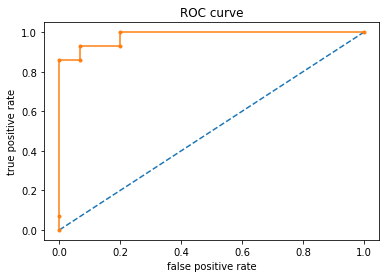

In [442]:
plot_roc(y_test,probs)